### Imports

In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário
# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import allNodesRegions
    import studyRegion
    import TwitchGraphs
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

# Configuração de estilo dos gráficos
TwitchGraphs.setup_style()

In [2]:
output_dir = Path.cwd().parent / 'docs' / 'Imagens'
output_dir


WindowsPath('c:/Users/diogo/Desktop/ARA/Projeto/Twitch/docs/Imagens')

## Calcular as variáveis

<b> NOTA: O código Abaixo só devo ser corrido caso seja necessário recalcular as novas variáveis! </b>

### Visualizar um exemplo dos dados

In [3]:
pais = countries[4]
df = pd.read_csv(base_dir / 'data' / pais / 'processed_data' / f'twitch_network_analysis_{pais}.csv', sep = ',', encoding='utf-8')
df

,node,degree,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank_centrality,clustering_coef,louvain_community,lp_community,...,created_at,profile_pic,broadcaster_type,game_name,day_of_year,is_leap,days_in_year,normalized_day,sin_created_at,cos_created_at
0,4867,9,0.001374,0.388214,2.229769e-06,0.005480,0.000054,0.333333,0,0,...,2017-03-14,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,S.T.A.L.K.E.R. 2: Heart of Chornobyl,73.0,False,365,1.239423,0.945596,0.325342
1,3692,13,0.001985,0.390157,1.124850e-05,0.004732,0.000068,0.217949,1,0,...,2016-06-02,https://static-cdn.jtvnw.net/jtv_user_pictures...,non_Streamer,Rocket League,154.0,True,366,2.626577,0.492548,-0.870285
2,3816,25,0.003818,0.378519,2.629061e-05,0.004740,0.000110,0.396667,2,0,...,2017-05-06,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,Resident Evil 4,126.0,False,365,2.151776,0.835925,-0.548843
3,416,28,0.004276,0.393936,4.954179e-05,0.006860,0.000119,0.306878,2,0,...,2012-08-30,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,Just Chatting,243.0,True,366,4.154456,-0.848351,-0.529434
4,4502,30,0.004582,0.394791,1.355823e-04,0.004564,0.000142,0.151724,4,0,...,2013-07-29,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,Dark and Darker,210.0,False,365,3.597769,-0.440519,-0.897743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,6546,4,0.000611,0.356470,3.356543e-07,0.001728,0.000039,0.500000,2,0,...,2012-03-22,https://static-cdn.jtvnw.net/jtv_user_pictures...,non_Streamer,DiRT Rally,82.0,True,366,1.390541,0.983798,0.179281
6545,2392,49,0.007483,0.433413,1.322898e-04,0.016946,0.000202,0.261054,0,0,...,2016-05-15,https://static-cdn.jtvnw.net/jtv_user_pictures...,partner,S.T.A.L.K.E.R. 2: Heart of Chornobyl,136.0,True,366,2.317568,0.733885,-0.679273
6546,391,16,0.002443,0.380742,2.760374e-05,0.003964,0.000082,0.158333,2,0,...,2017-01-08,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,Darkest Dungeon,8.0,False,365,0.120499,0.120208,0.992749
6547,2793,1,0.000153,0.284263,0.000000e+00,0.000046,0.000027,0.000000,1,0,...,2016-08-05,https://static-cdn.jtvnw.net/jtv_user_pictures...,non_Streamer,The First Descendant,218.0,True,366,3.725277,-0.551102,-0.834438


## Comparação entre as diferentes regiões

In [4]:
df = pd.read_csv(base_dir / 'data' / 'AllCountries' / 'network_metrics_summary.csv', sep = ',', encoding='utf-8')
df

,Country,Number of Nodes,Number of Edges,Diameter,Density,Average Clustering Coefficient,Transitivity,Average Path Length,Assortativity,Modularity,...,Non-Streamer Broadcasters,Degree Centralization,Betweenness Centralization,Degree Std,Degree Skewness,Global Efficiency,On-Videogame Channels,Off-Videogame Channels,Non-Videogame Channels,Non-Content
0,PTBR,1912,31299,7,0.017132,0.319895,0.130981,2.532379,-0.232462,0.284464,...,397,0.384228,0.098459,55.837791,5.637044,0.422379,1442,151,202,117
1,DE,9498,153138,7,0.003395,0.200886,0.046471,2.721571,-0.115173,0.292580,...,4371,0.445062,0.291061,84.797544,19.964407,0.389143,7205,780,856,657
2,ENGB,7126,35324,10,0.001391,0.130928,0.042433,3.677616,-0.121908,0.462488,...,1872,0.099661,0.126391,22.188706,14.412251,0.288730,5527,624,452,523
3,ES,4648,59382,9,0.005499,0.222496,0.084235,2.883191,-0.189051,0.409267,...,1537,0.214428,0.110712,49.394543,7.902855,0.369027,3512,382,502,252
4,FR,6549,112666,7,0.005255,0.221706,0.054128,2.680991,-0.178151,0.338921,...,2738,0.306291,0.100029,77.492201,11.876869,0.394712,4964,530,568,487
5,RU,4385,37304,9,0.003881,0.165797,0.048648,3.021095,-0.182289,0.342013,...,1461,0.276457,0.176945,41.677658,12.393324,0.353563,2972,530,597,286


### Nulos

PTBR: 50 usernames nulos
DE: 234 usernames nulos
ENGB: 160 usernames nulos
ES: 120 usernames nulos
FR: 150 usernames nulos
RU: 222 usernames nulos


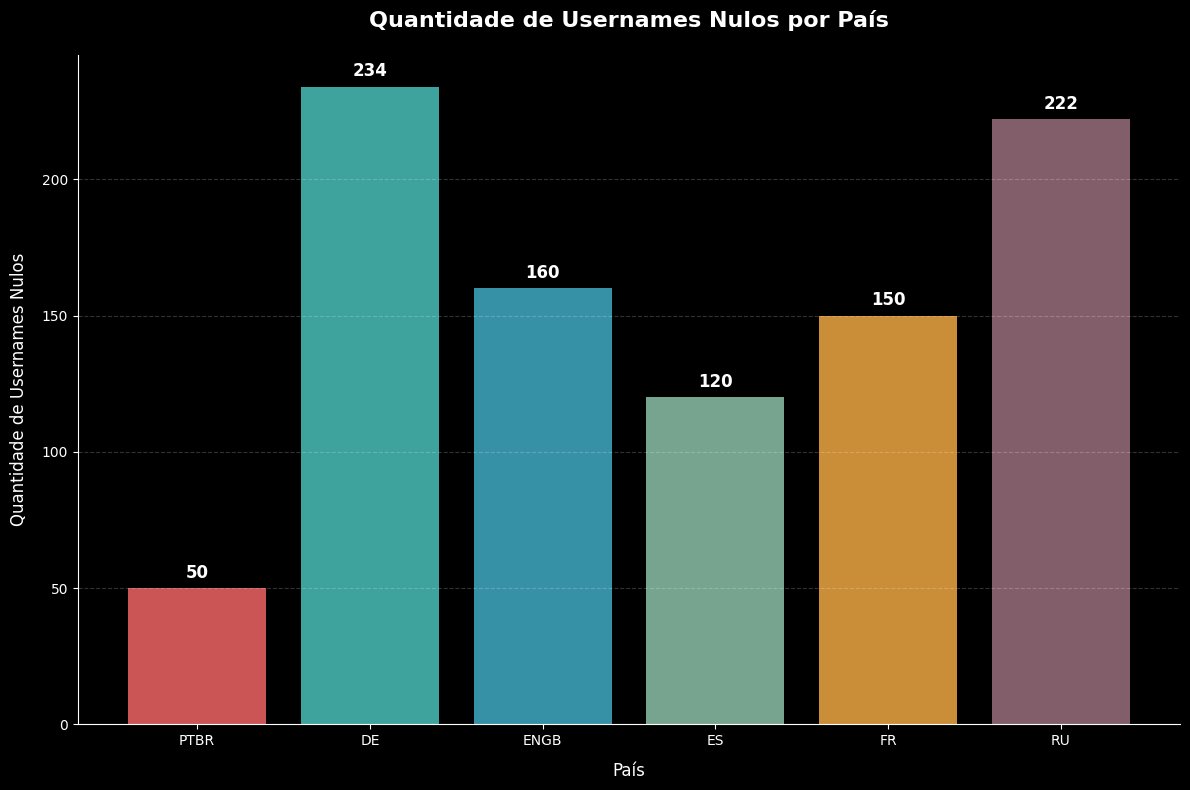

In [5]:
null_usernames = TwitchGraphs.plot_null_usernames(countries, base_dir, output_dir)

### Nodes

In [6]:
df.columns

Index(['Country', 'Number of Nodes', 'Number of Edges', 'Diameter', 'Density',
       'Average Clustering Coefficient', 'Transitivity', 'Average Path Length',
       'Assortativity', 'Modularity', 'Degree Centrality (mean)',
       'Betweenness Centrality (mean)', 'Closeness Centrality (mean)',
       'Eigenvector Centrality (mean)', 'PageRank Centrality (mean)',
       'Number of Mature Nodes', 'Number of Partner Nodes',
       'Number of Non-Mature Nodes', 'Number of Non-Partner Nodes',
       'Average Views', 'Views Std', 'Total Views', 'Partner Broadcasters',
       'Affiliate Broadcasters', 'Account Deleted Broadcasters',
       'Non-Streamer Broadcasters', 'Degree Centralization',
       'Betweenness Centralization', 'Degree Std', 'Degree Skewness',
       'Global Efficiency', 'On-Videogame Channels', 'Off-Videogame Channels',
       'Non-Videogame Channels', 'Non-Content'],
      dtype='object')

#### **Mature**

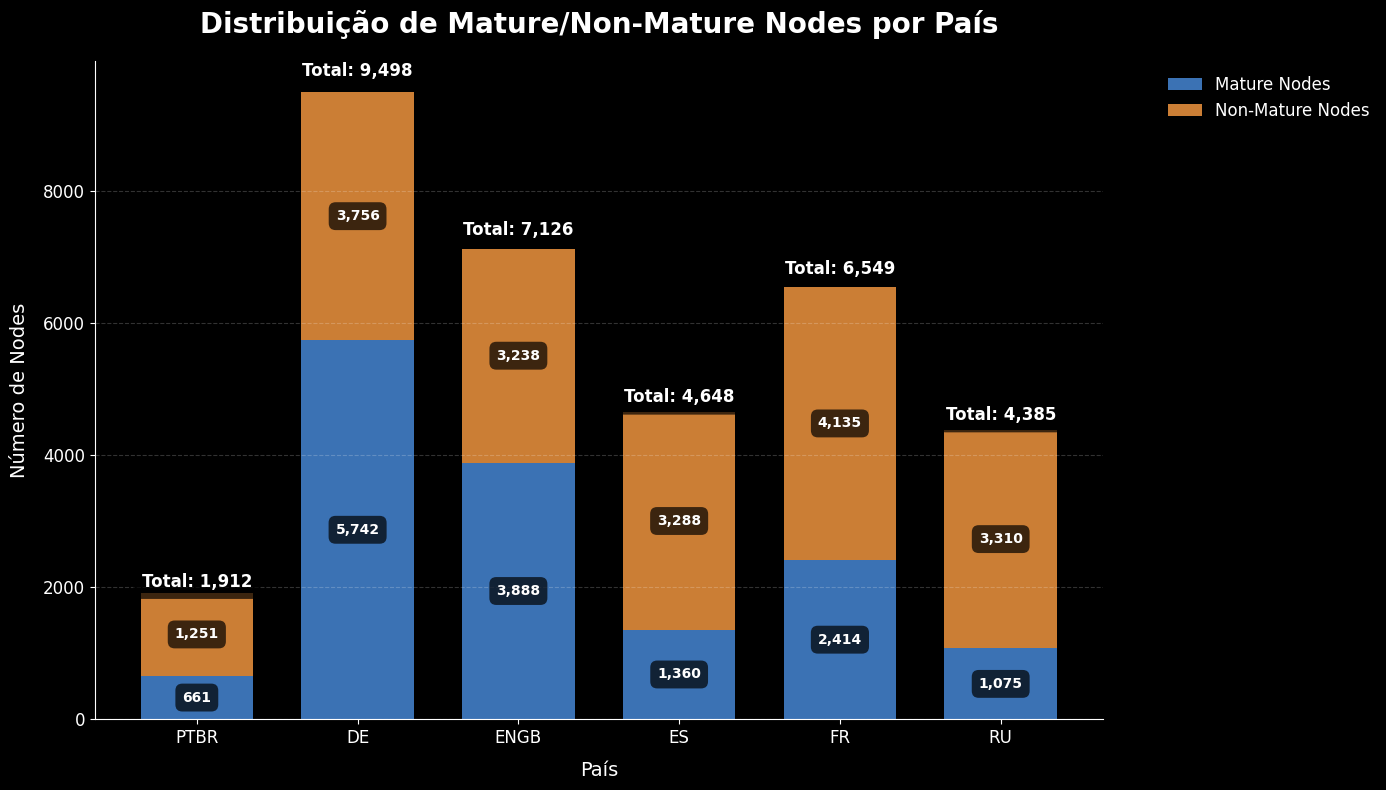

In [7]:
TwitchGraphs.plot_mature_nodes_distribution(df, output_dir)

No gráfico acima, é possível observar a quantidade total de nós em cada uma das regiões, sendo destacada a proporção de nós com conteúdo _mature_ e _non-mature_. 

- **Definição de Conta _Mature_:** Na Twitch, uma conta é classificada como **_mature_** quando o seu conteúdo é direcionado a um público adulto, geralmente por conter linguagem explícita, temas sensíveis ou outro tipo de material não recomendado para todas as idades.

- **Amostra por País:** Nota-se que a região **DE** apresenta a maior amostra de dados, enquanto **PTBR** possui a menor.

- **Distribuição de Conteúdo _Mature_:** Apenas as regiões **DE** e **ENGB** possuem uma maioria relativa de nós classificados como _mature_. Nas demais regiões, o número de nós _non-mature_ é predominante.

Esta análise permite identificar não apenas a representatividade de cada país, mas também as diferenças na classificação de conteúdo, proporcionando insights importantes sobre as características das comunidades em cada região.


#### **Broadcasters**

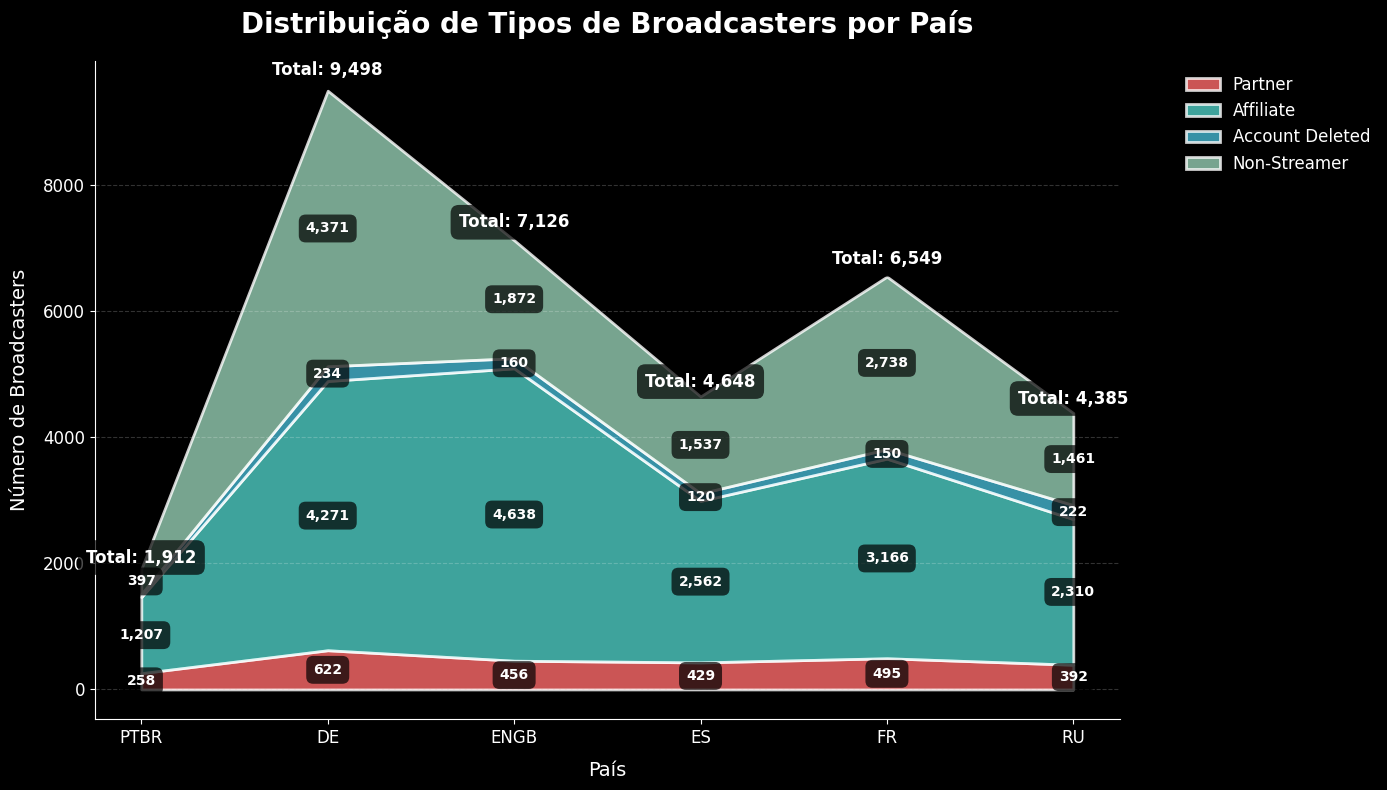

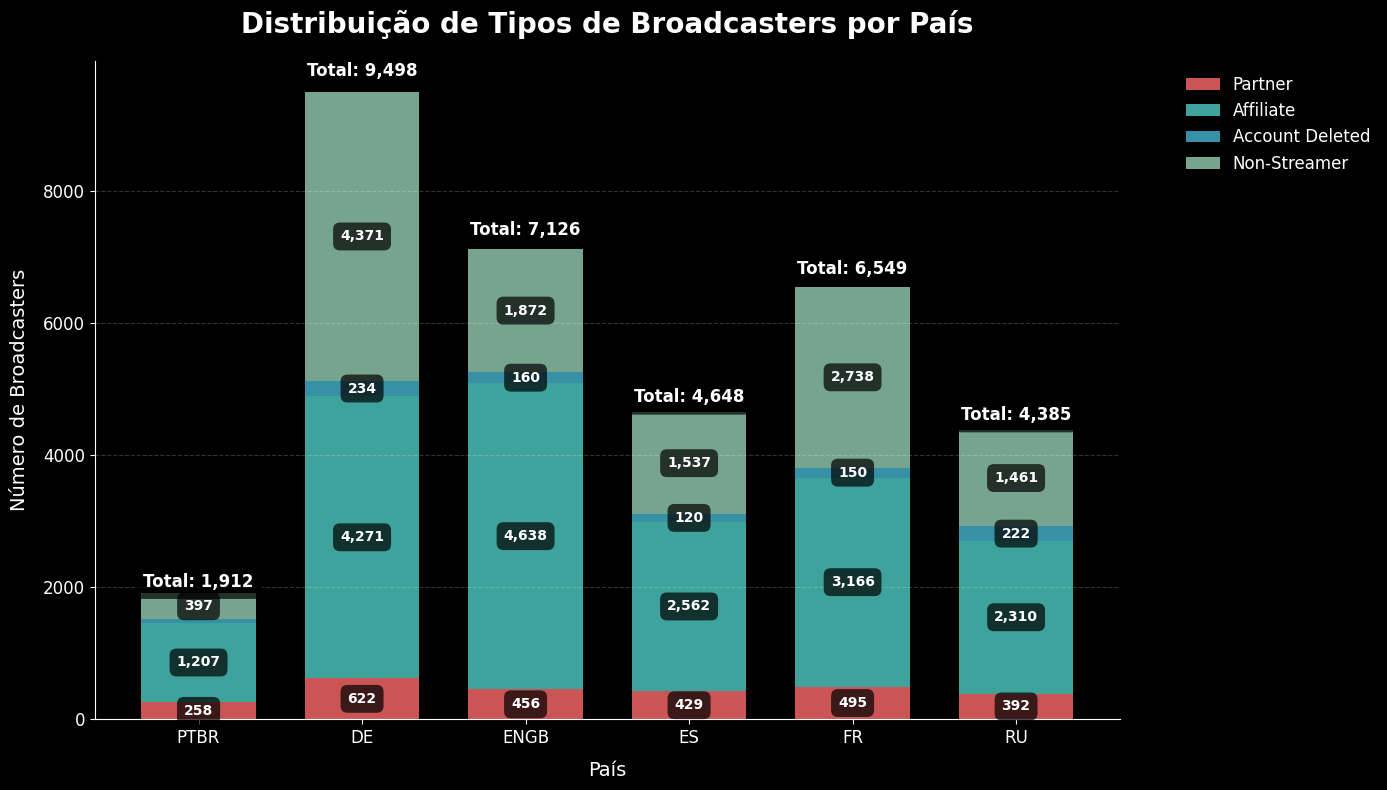

In [8]:
TwitchGraphs.plot_broadcaster_types_ribbon(df, output_dir)
TwitchGraphs.plot_broadcaster_types_by_country(df, output_dir)

In [9]:
content_counts = df.groupby(['On-Videogame Channels','Off-Videogame Channels','Non-Videogame Channels','Non-Content']).size().unstack(fill_value=0)
content_counts

,,Non-Content,117,252,286,487,523,657
On-Videogame Channels,Off-Videogame Channels,Non-Videogame Channels,,,,,,
1442,151,202,1,0,0,0,0,0
2972,530,597,0,0,1,0,0,0
3512,382,502,0,1,0,0,0,0
4964,530,568,0,0,0,1,0,0
5527,624,452,0,0,0,0,1,0
7205,780,856,0,0,0,0,0,1


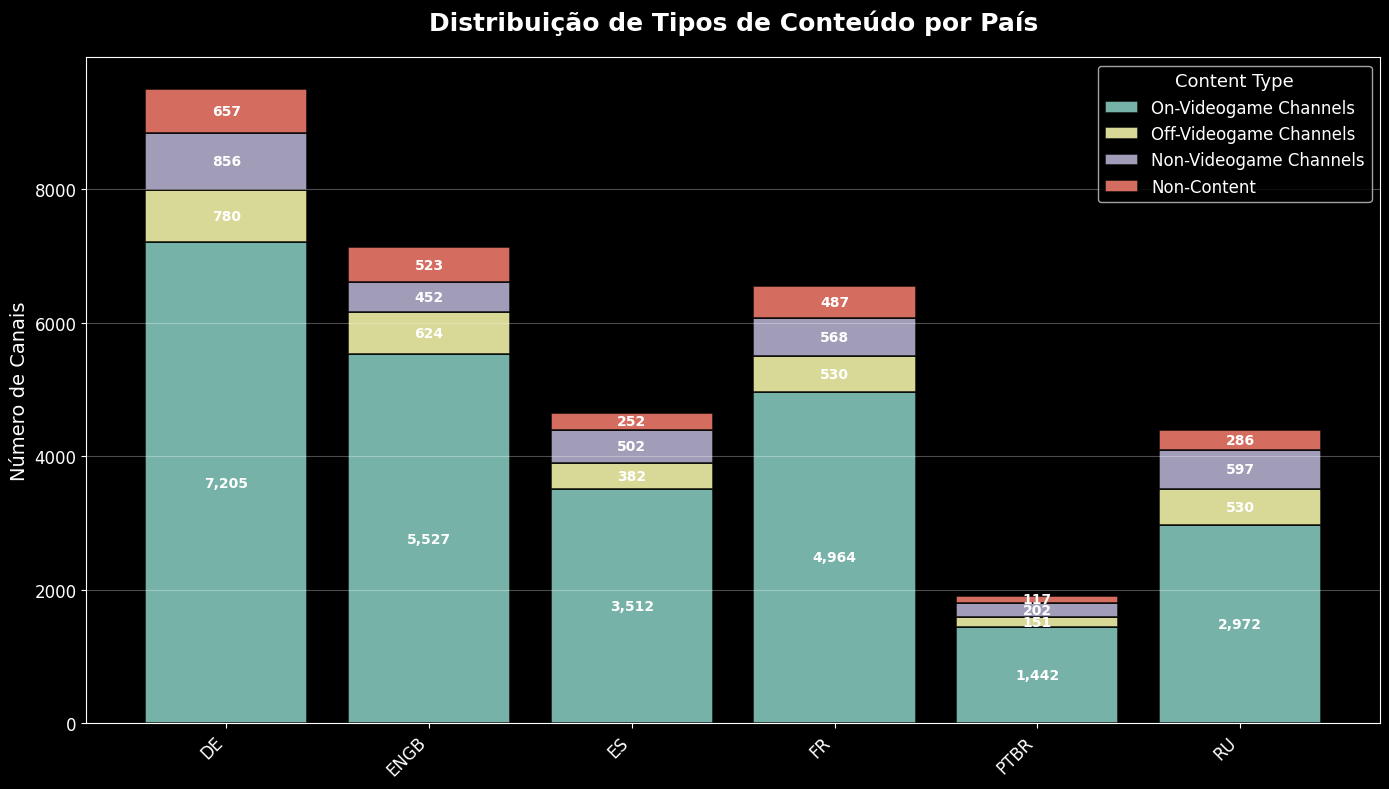

In [10]:
TwitchGraphs.plot_content_type_comparison(df, output_dir)

### Análise métricas

In [11]:
# Título: Métricas de Estrutura e Conectividade da Rede

df[['Country', 'Number of Nodes', 'Number of Edges', 'Diameter', 'Density', 'Average Path Length']]

,Country,Number of Nodes,Number of Edges,Diameter,Density,Average Path Length
0,PTBR,1912,31299,7,0.017132,2.532379
1,DE,9498,153138,7,0.003395,2.721571
2,ENGB,7126,35324,10,0.001391,3.677616
3,ES,4648,59382,9,0.005499,2.883191
4,FR,6549,112666,7,0.005255,2.680991
5,RU,4385,37304,9,0.003881,3.021095


In [12]:
# Título: Métricas de Eficiência e Estrutura

df[['Assortativity', 'Global Efficiency']]


,Assortativity,Global Efficiency
0,-0.232462,0.422379
1,-0.115173,0.389143
2,-0.121908,0.288730
3,-0.189051,0.369027
4,-0.178151,0.394712
5,-0.182289,0.353563


In [13]:
# Título: Métricas de Conectividade

df[['Country', "Number of Nodes", "Degree Centrality (mean)", "Betweenness Centrality (mean)", "Closeness Centrality (mean)", "Eigenvector Centrality (mean)", "PageRank Centrality (mean)"]]


,Country,Number of Nodes,Degree Centrality (mean),Betweenness Centrality (mean),Closeness Centrality (mean),Eigenvector Centrality (mean),PageRank Centrality (mean)
0,PTBR,1912,0.017132,0.000802,0.401857,0.014118,0.000523
1,DE,9498,0.003395,0.000181,0.373517,0.005512,0.000105
2,ENGB,7126,0.001391,0.000376,0.276473,0.005923,0.000140
3,ES,4648,0.005499,0.000405,0.352079,0.008450,0.000215
4,FR,6549,0.005255,0.000257,0.378272,0.007270,0.000153
5,RU,4385,0.003881,0.000461,0.337113,0.007905,0.000228


In [14]:
# Titulo: Métricas de Centralização

df[["Country", "Degree Centralization", "Betweenness Centralization"]]

,Country,Degree Centralization,Betweenness Centralization
0,PTBR,0.384228,0.098459
1,DE,0.445062,0.291061
2,ENGB,0.099661,0.126391
3,ES,0.214428,0.110712
4,FR,0.306291,0.100029
5,RU,0.276457,0.176945


In [15]:
# Titulo: Agrupamento e Comunidades

df[["Average Clustering Coefficient", "Modularity", "Transitivity"]]

,Average Clustering Coefficient,Modularity,Transitivity
0,0.319895,0.284464,0.130981
1,0.200886,0.292580,0.046471
2,0.130928,0.462488,0.042433
3,0.222496,0.409267,0.084235
4,0.221706,0.338921,0.054128
5,0.165797,0.342013,0.048648


In [16]:
# Titulo: Métricas de Visualizações

df[["Average Views","Views Std", "Total Views"]]

,Average Views,Views Std,Total Views
0,408715.103033,3.453560e+06,781463277
1,143151.964835,1.640443e+06,1359657362
2,193470.244738,2.968757e+06,1378668964
3,103236.732573,8.851899e+05,479844333
4,181448.639182,2.248663e+06,1188307138
5,389743.226910,3.568974e+06,1709024050


In [17]:
# Título: Distribuição de Graus

df[['Degree Std','Degree Skewness']]

,Degree Std,Degree Skewness
0,55.837791,5.637044
1,84.797544,19.964407
2,22.188706,14.412251
3,49.394543,7.902855
4,77.492201,11.876869
5,41.677658,12.393324


---

In [18]:
df[["Country", "Partner Broadcasters", "Affiliate Broadcasters","Account Deleted Broadcasters","Non-Streamer Broadcasters"]]

,Country,Partner Broadcasters,Affiliate Broadcasters,Account Deleted Broadcasters,Non-Streamer Broadcasters
0,PTBR,258,1207,50,397
1,DE,622,4271,234,4371
2,ENGB,456,4638,160,1872
3,ES,429,2562,120,1537
4,FR,495,3166,150,2738
5,RU,392,2310,222,1461


**Definição:**  
A análise classifica os broadcasters da Twitch em quatro categorias:  
- **Partner:** Streamers reconhecidos por alcançar um alto nível de influência na plataforma.  
- **Affiliate:** Streamers que atendem aos critérios básicos para monetização.  
- **Account Deleted:** Contas que foram removidas ou desativadas.  
- **Non-Streamer:** Contas que não realizam transmissões.  

**Resumo por País:**

| **País** | **Total de Broadcasters** | **Partner** | **Affiliate** | **Account Deleted** | **Non-Streamer** |
|----------|---------------------------|-------------|---------------|---------------------|-------------------|
| PTBR     | 1,912                     | 258         | 1,207         | 50                  | 397               |
| DE       | 9,498                     | 622         | 4,271         | 234                 | 4,371             |
| ENGB     | 7,126                     | 456         | 4,638         | 160                 | 1,872             |
| ES       | 4,648                     | 429         | 2,562         | 120                 | 1,537             |
| FR       | 6,549                     | 495         | 3,166         | 150                 | 2,738             |
| RU       | 4,385                     | 392         | 2,310         | 222                 | 1,461             |

**Observações:**
1. **DE (Alemão):**  
   - Apresenta o maior número total de broadcasters (**9,498**).  
   - Destaque para a alta quantidade de **Non-Streamers** (**4,371**), representando quase metade da rede.  
   - Possui uma comunidade expressiva de **Affiliates** (**4,271**).  

2. **ENGB (Inglês Britânico):**  
   - Lidera na quantidade de **Affiliates** (**4,638**), mostrando um grande número de broadcasters com monetização básica.  
   - Um número significativo de **Non-Streamers** (**1,872**), embora inferior a **DE**.  

3. **PTBR (Português do Brasil):**  
   - Possui o menor total de broadcasters (**1,912**), mas com uma proporção expressiva de **Affiliates** (**1,207**, cerca de 63% do total).  
   - O número de **Partners** (**258**) é modesto, refletindo uma comunidade em crescimento.  

4. **ES (Espanhol):**  
   - Um equilíbrio notável entre **Affiliates** (**2,562**) e **Non-Streamers** (**1,537**).  
   - A quantidade de **Partners** (**429**) é consistente com outras redes menores.  

5. **FR (Francês):**  
   - Apresenta um elevado número de **Affiliates** (**3,166**) e **Non-Streamers** (**2,738**), com proporções semelhantes.  
   - O número de **Partners** (**495**) está ligeiramente acima de países como **PTBR** e **ES**.  

6. **RU (Russo):**  
   - Mostra proporções equilibradas entre **Affiliates** (**2,310**) e **Non-Streamers** (**1,461**).  
   - Um número moderado de **Partners** (**392**) reforça a consistência da rede.  

**Conclusão:**  
- O país **DE** lidera em número total de broadcasters, com destaque para uma alta concentração de **Non-Streamers**, sugerindo uma rede ampla, mas menos ativa.  
- **PTBR** apresenta a menor comunidade em números absolutos, mas uma alta proporção de **Affiliates**, evidenciando uma base engajada.  
- Redes como **FR**, **ES**, e **ENGB** mostram perfis mistos com significativa presença de **Affiliates**, enquanto **RU** mantém uma distribuição equilibrada.  

### Assortativity

Na teoria dos grafos, **assortatividade** (ou coeficiente de assortatividade) mede o grau de correlação entre as características dos vértices que estão conectados por uma aresta. Esta métrica é frequentemente usada para entender padrões de ligação em redes complexas e sociais.

**Definição Matemática**
Assortatividade é definida como o coeficiente de correlação de Pearson entre as características dos nós em cada extremidade de uma aresta. Pode ser representada matematicamente como:

$$
r = \frac{\sum_{i}(j_i - \bar{j})(k_i - \bar{k})}{\sqrt{\sum_{i}(j_i - \bar{j})^2 \sum_{i}(k_i - \bar{k})^2}}
$$

Onde:
- $ j_i \ e \ k_i $ são os valores das características dos dois nós conectados por uma aresta.
- $ \bar{j} \ e \ \bar{k} $ são as médias das características.

In [19]:
df[["Country", "Assortativity"]]

,Country,Assortativity
0,PTBR,-0.232462
1,DE,-0.115173
2,ENGB,-0.121908
3,ES,-0.189051
4,FR,-0.178151
5,RU,-0.182289


**Valores do Coeficiente**
- **\( r > 0 \)**: Indica uma rede assortativa, ou seja, existe uma tendência de nós semelhantes (em grau ou característica) estarem conectados.
- **\( r < 0 \)**: Indica uma rede dissortativa, onde nós diferentes estão mais propensos a se conectar.
- **\( r = 0 \)**: Indica que não há correlação aparente entre os nós conectados.

**Conclusão**

As assortatividades dos grafos analisados para diferentes regiões da Twitch são todas **negativas e próximas de 0**, indicando que as redes apresentam uma leve tendência dissortativa. Isto sugere que os nós com alto grau de conexões, como streamers com muitas amizades na plataforma, tendem a conectar-se com nós de baixo grau, como contas com menos conexões. 

No contexto da Twitch, este comportamento pode ser explicado pelo fato de que contas com menor grau frequentemente se conectam não apenas ao streamer principal (o hub da rede), mas também entre si, formando subgrupos locais de interação dentro da comunidade do streamer. Esta estrutura cria uma rede relativamente equilibrada e interligada, com um papel central desempenhado pelos hubs, mas sem uma polarização extrema nas conexões.

---

### Diameter & Average Path Length

In [20]:
df[["Country", "Diameter", "Average Clustering Coefficient", "Number of Edges", "Density", "Betweenness Centrality (mean)", "Closeness Centrality (mean)"]]

,Country,Diameter,Average Clustering Coefficient,Number of Edges,Density,Betweenness Centrality (mean),Closeness Centrality (mean)
0,PTBR,7,0.319895,31299,0.017132,0.000802,0.401857
1,DE,7,0.200886,153138,0.003395,0.000181,0.373517
2,ENGB,10,0.130928,35324,0.001391,0.000376,0.276473
3,ES,9,0.222496,59382,0.005499,0.000405,0.352079
4,FR,7,0.221706,112666,0.005255,0.000257,0.378272
5,RU,9,0.165797,37304,0.003881,0.000461,0.337113


- **Diameter**: O diâmetro de um grafo é a maior distância mínima (geodésica) entre dois nós no grafo. Representa o caminho mais longo, em termos de número de arestas, que conecta dois nós na rede.
- **Average Path Length**: O comprimento médio dos caminhos é a média das distâncias mínimas (geodésicas) entre todos os pares de nós no grafo. Reflete a eficiência da conectividade da rede.

**Análise dos Valores**

| **Country** | **Diameter** | **Average Path Length** |
|-------------|--------------|--------------------------|
| PTBR        | 7            | 2.532                   |
| DE          | 7            | 2.722                   |
| ENGB        | 10           | 3.678                   |
| ES          | 9            | 2.883                   |
| FR          | 7            | 2.681                   |
| RU          | 9            | 3.021                   |

**Observações**
1. **Diâmetro:**
   - O diâmetro mais elevado foi registado na região **ENGB**, com um valor de **10**, indicando que as redes dessa região têm uma maior dispersão em termos de conectividade.
   - As regiões **PTBR**, **DE** e **FR** apresentam um diâmetro mais reduzido (**7**), o que sugere uma rede mais compacta.

2. **Comprimento Médio dos Caminhos:**
   - **PTBR** possui o menor comprimento médio dos caminhos (**2.532**), sugerindo uma rede eficiente com conexões curtas entre os nós.
   - **ENGB** apresenta o maior comprimento médio (**3.678**), indicando uma rede com caminhos relativamente mais longos entre os nós.

**Conclusão**

As diferenças observadas no **diâmetro** e no **comprimento médio dos caminhos** refletem variações na estrutura das redes da Twitch entre as diferentes regiões. Regiões como **PTBR** possuem redes mais compactas e conectadas, enquanto **ENGB** evidencia uma rede mais dispersa, com maior distância média entre os nós. Esta disparidade pode estar associada à densidade e organização das comunidades dentro de cada região.

---

### Nós

In [21]:
df[["Country", "Average Clustering Coefficient","Betweenness Centralization", "Global Efficiency", "Transitivity"]]

,Country,Average Clustering Coefficient,Betweenness Centralization,Global Efficiency,Transitivity
0,PTBR,0.319895,0.098459,0.422379,0.130981
1,DE,0.200886,0.291061,0.389143,0.046471
2,ENGB,0.130928,0.126391,0.288730,0.042433
3,ES,0.222496,0.110712,0.369027,0.084235
4,FR,0.221706,0.100029,0.394712,0.054128
5,RU,0.165797,0.176945,0.353563,0.048648


**Definições**  
- **Average Clustering Coefficient (Coeficiente Médio de Agrupamento):**  
  Mede o grau médio de agrupamento dos nós, indicando a tendência de formação de triângulos (comunidades locais) na rede.  

- **Betweenness Centralization (Centralização de Intermediação):**  
  Avalia a concentração de intermediação em poucos nós, medindo quanto a rede depende de nós centrais para conectar os outros.  

- **Global Efficiency (Eficiência Global):**  
  Refere-se à eficiência média com que a informação é trocada entre todos os nós da rede.  

- **Transitivity (Transitividade):**  
  Mede a probabilidade de que dois nós que são vizinhos de um mesmo nó também sejam vizinhos entre si, ou seja, a tendência global de formação de triângulos na rede.  

**Resumo por País**

| País   | Average Clustering Coefficient | Betweenness Centralization | Global Efficiency | Transitivity |
|--------|--------------------------------|-----------------------------|-------------------|--------------|
| PTBR   | 0.319895                       | 0.098459                    | 0.422379          | 0.130981     |
| DE     | 0.200886                       | 0.291061                    | 0.389143          | 0.046471     |
| ENGB   | 0.130928                       | 0.126391                    | 0.288730          | 0.042433     |
| ES     | 0.222496                       | 0.110712                    | 0.369027          | 0.084235     |
| FR     | 0.221706                       | 0.100029                    | 0.394712          | 0.054128     |
| RU     | 0.165797                       | 0.176945                    | 0.353563          | 0.048648     |

**Análise e Observações**  

1. **PTBR (Português do Brasil):**  
   - O maior **coeficiente de agrupamento** (0.320), indicando uma rede mais coesa, com maior formação de comunidades locais.  
   - A menor **centralização de intermediação** (0.098), sugerindo que a rede é mais distribuída, com menor dependência de nós centrais.  
   - A maior **eficiência global** (0.422), destacando uma rede eficiente na troca de informação.  
   - A **transitividade** mais alta (0.131), refletindo uma forte tendência global para formação de triângulos.  

2. **DE (Alemão):**  
   - O menor **coeficiente de agrupamento** (0.201), indicando uma rede menos coesa.  
   - A maior **centralização de intermediação** (0.291), mostrando dependência significativa de nós centrais para conectar a rede.  
   - **Eficiência global** moderada (0.389), apesar da alta centralização.  
   - **Transitividade** baixa (0.046), indicando uma fraca tendência para a formação de triângulos.  

3. **ENGB (Inglês Britânico):**  
   - O segundo menor **coeficiente de agrupamento** (0.131), refletindo baixa densidade de comunidades locais.  
   - **Centralização de intermediação** moderada (0.126).  
   - A menor **eficiência global** (0.289), indicando maior dificuldade de comunicação na rede.  
   - A menor **transitividade** (0.042), apontando para baixa formação de triângulos globais.  

4. **ES (Espanhol):**  
   - **Coeficiente de agrupamento** (0.222) relativamente alto, sugerindo comunidades locais bem definidas.  
   - **Centralização de intermediação** baixa (0.111), sugerindo uma rede menos centralizada.  
   - **Eficiência global** (0.369) intermediária, destacando um equilíbrio razoável entre conectividade e descentralização.  
   - **Transitividade** (0.084), moderada, reforçando a formação de triângulos globais.  

5. **FR (Francês):**  
   - Um **coeficiente de agrupamento** (0.222) semelhante ao de **ES**, com formação de comunidades locais.  
   - **Centralização de intermediação** baixa (0.100), refletindo uma rede distribuída.  
   - **Eficiência global** alta (0.395), próxima da de **PTBR**, destacando boa conectividade.  
   - **Transitividade** (0.054), moderada, indicando alguma formação de triângulos.  

6. **RU (Russo):**  
   - **Coeficiente de agrupamento** (0.166) moderado, indicando uma densidade local inferior à de **PTBR** e **ES**.  
   - **Centralização de intermediação** (0.177), mais alta que a maioria, mas inferior à de **DE**.  
   - **Eficiência global** (0.354), mostrando um equilíbrio entre conectividade e centralização.  
   - **Transitividade** (0.049), indicando baixa formação de triângulos globais.  

**Conclusão**  

- **PTBR** destaca-se como a rede mais coesa e eficiente, com alta conectividade local e baixa dependência de nós centrais.  
- **DE** possui a maior centralização e menor agrupamento, sugerindo uma rede hierárquica e dependente de poucos nós.  
- **ENGB** apresenta desafios de conectividade, com a menor eficiência global e baixa coesão local.  
- **ES** e **FR** têm características equilibradas, com boa formação de comunidades e conectividade eficiente.  
- **RU** apresenta uma rede moderadamente centralizada, com agrupamento e eficiência globais intermediários.  


---

### Degree


In [22]:
df[["Country", "Degree Centrality (mean)", "Degree Skewness", "Degree Std", "Degree Centralization"]]

,Country,Degree Centrality (mean),Degree Skewness,Degree Std,Degree Centralization
0,PTBR,0.017132,5.637044,55.837791,0.384228
1,DE,0.003395,19.964407,84.797544,0.445062
2,ENGB,0.001391,14.412251,22.188706,0.099661
3,ES,0.005499,7.902855,49.394543,0.214428
4,FR,0.005255,11.876869,77.492201,0.306291
5,RU,0.003881,12.393324,41.677658,0.276457


**Definições:**  
- **Degree Centrality (mean):** Mede a conectividade média dos nós em relação ao número total de nós na rede.  
- **Degree Skewness:** Reflete a assimetria da distribuição dos graus dos nós; valores altos indicam a presença de hubs.  
- **Degree Std:** Mede a variabilidade nos graus dos nós.  
- **Degree Centralization:** Indica o grau de centralização da rede; valores altos refletem uma rede mais dependente de poucos nós centrais.

**Valores Observados**

| **Country** | **Degree Centrality (mean)** | **Degree Skewness** | **Degree Std** | **Degree Centralization** |
|-------------|-------------------------------|----------------------|----------------|---------------------------|
| PTBR        | 0.017132                      | 5.637044            | 55.837791      | 0.384228                  |
| DE          | 0.003395                      | 19.964407           | 84.797544      | 0.445062                  |
| ENGB        | 0.001391                      | 14.412251           | 22.188706      | 0.099661                  |
| ES          | 0.005499                      | 7.902855            | 49.394543      | 0.214428                  |
| FR          | 0.005255                      | 11.876869           | 77.492201      | 0.306291                  |
| RU          | 0.003881                      | 12.393324           | 41.677658      | 0.276457                  |

**Observações:**
1. **PTBR** apresenta o maior **Degree Centrality (mean)** (**0.017132**), sugerindo uma rede onde os nós são mais conectados em média.  
2. **DE** tem o maior **Degree Skewness** (**19.964407**) e o maior **Degree Std** (**84.797544**), refletindo uma rede altamente assimétrica com nós muito variáveis em conectividade.  
3. **ENGB** apresenta o menor **Degree Centrality (mean)** (**0.001391**) e o menor **Degree Centralization** (**0.099661**), indicando uma rede dispersa e pouco dependente de nós centrais.  
4. **FR** e **RU** mostram métricas intermediárias, com **Degree Std** mais elevados, sugerindo maior variabilidade nos graus.  

**Conclusão:**  
- Redes como a de **PTBR** destacam-se pela maior conectividade média dos nós.  
- A rede **DE** apresenta características marcantes de hubs, com uma forte centralização e variabilidade.  
- Já **ENGB** tem a rede mais homogénea e menos centralizada, enquanto **FR** e **RU** evidenciam maior dispersão nos graus.  


---

# Views

In [23]:
df[["Country","Number of Nodes", "Average Views","Views Std","Total Views"]]

,Country,Number of Nodes,Average Views,Views Std,Total Views
0,PTBR,1912,408715.103033,3.453560e+06,781463277
1,DE,9498,143151.964835,1.640443e+06,1359657362
2,ENGB,7126,193470.244738,2.968757e+06,1378668964
3,ES,4648,103236.732573,8.851899e+05,479844333
4,FR,6549,181448.639182,2.248663e+06,1188307138
5,RU,4385,389743.226910,3.568974e+06,1709024050


**Definições:**  
- **Número de Nós (Nodes):** Representa o número de streamers/broadcasters em cada país.  
- **Average Views:** Média de visualizações por streamer.  
- **Views Std:** Desvio padrão das visualizações, indicando a variabilidade nas visualizações dos streamers.  
- **Total Views:** Soma total de todas as visualizações dos streamers num país.

**Resumo por País:**

| **País** | **Número de Nós** | **Average Views** | **Views Std**        | **Total Views**   |
|----------|--------------------|--------------------|----------------------|-------------------|
| **PTBR** | 1,912              | 408,715           | 3,453,560            | 781,463,277       |
| **DE**   | 9,498              | 143,152           | 1,640,443            | 1,359,657,362     |
| **ENGB** | 7,126              | 193,470           | 2,968,757            | 1,378,668,964     |
| **ES**   | 4,648              | 103,237           | 885,190              | 479,844,333       |
| **FR**   | 6,549              | 181,449           | 2,248,663            | 1,188,307,138     |
| **RU**   | 4,385              | 389,743           | 3,568,974            | 1,709,024,050     |

**Análise de Desempenho Relativo ao Número de Nós:**

1. **PTBR (Português do Brasil):**  
   - Tem um número relativamente pequeno de **nós** (**1,912**), mas uma **Average Views** muito alta (**408,715**), indicando que os streamers brasileiros mais famosos têm um impacto considerável, apesar da comunidade ser menor.  
   - O **Total Views** é moderado devido ao número reduzido de streamers, mas a **Average Views** sugere que há streamers muito populares na comunidade.  

2. **DE (Alemão):**  
   - Possui um grande número de **nós** (**9,498**), mas com uma **Average Views** bastante baixa (**143,152**).  
   - O **Total Views** é um dos maiores (**1,359,657,362**), mas isso é principalmente devido ao grande número de streamers. A variabilidade nas visualizações (**Views Std: 1,640,443**) também é significativa, sugerindo que alguns streamers têm um grande número de visualizações, enquanto outros têm muito menos.  

3. **ENGB (Inglês Britânico):**  
   - Com **7,126** **nós**, tem uma **Average Views** de **193,470**, uma média moderada.  
   - **Total Views** de **1,378,668,964**, que é o segundo maior, indicando uma comunidade ativa e diversificada de streamers. O desvio padrão (**2,968,757**) é alto, o que significa uma grande diferença no desempenho entre streamers.  

4. **ES (Espanhol):**  
   - O número de **nós** (**4,648**) é intermediário, mas a **Average Views** é a mais baixa (**103,237**), refletindo um impacto menor por streamer.  
   - O **Total Views** também é menor (**479,844,333**), o que reflete uma comunidade menor e com menor impacto agregado.  

5. **FR (Francês):**  
   - Com **6,549** **nós**, a **Average Views** é de **181,449**, mais alta do que a de **ES** mas inferior a **RU** e **PTBR**.  
   - O **Total Views** (**1,188,307,138**) é considerável, refletindo uma comunidade ativa e engajada.  

6. **RU (Russo):**  
   - Com **4,385** **nós**, apresenta a **Average Views** mais alta (**389,743**) e o **Total Views** mais elevado (**1,709,024,050**), sugerindo uma comunidade com streamers muito populares e engajados.  
   - A **Views Std** também é bastante alta (**3,568,974**), indicando grandes variações no número de visualizações entre os streamers.

**Conclusão:**  
- **PTBR** e **RU** destacam-se pela alta média de visualizações por streamer, apesar de terem um número relativamente baixo de **nós** em comparação com países como **DE** e **ENGB**.  
- **DE** e **ENGB** têm grandes comunidades de streamers, mas com médias de visualizações por streamer mais baixas, embora o **Total Views** seja elevado devido ao número de streamers.  
- Países como **ES** apresentam uma comunidade de streamers mais modesta, refletindo uma **Average Views** e **Total Views** mais baixos.
